### Problem Statement
#### Understanding the problem statement is the first and foremost step. This would help you give an intuition of what you will face ahead of time. Let us see the problem statement.
#### Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. Customers first apply for a home loan after that company validates the customer’s eligibility for a loan. The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, that are eligible for loan amounts so that they can specifically target these customers.
#### It is a classification problem where we have to predict whether a loan would be approved or not. In these kinds of problems, we have to predict discrete values based on a given set of independent variables.

### Hypothesis generation
#### After looking at the problem statement, we will now move into hypothesis generation. It is the process of listing out all the possible factors that can affect the outcome.
### What is Hypothesis Generation?
#### This is a very important stage in a data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming maximum possibilities that can impact the outcome. It is done by thoroughly understanding the problem statement before looking at the data.
#### Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem:
#### Salary: Applicants with high income should have more chances of getting approval.
#### Previous history: Applicants who have paid their historical debts have more chances of getting approval.
#### Loan amount: Less the amount higher the chances of getting approval.
#### Loan term: Less the time period has higher chances of approval.
#### EMI: Lesser the amount to be paid monthly, the higher the chances of getting approval.
#### These are some of the factors which I think can affect the target variable, you can find many more factors.

In [1]:
#import all the necessary libraries
import numpy as np           #for numerical calculations
import pandas as pd          #for data manipulation
import matplotlib.pyplot as plt    #for plotting graphs
import seaborn as sns       #for data visualization

### Data

#### For this problem, we have been given three CSV files: train, test, and sample submission.
#### - Train file will be used for training the model, i.e. our model will learn from this file. It contains all the
#### independent variables and the target variable.
#### - The test file contains all the independent variables, but not the target variable. We will apply the model
#### to predict the target variable for the test data.
#### - The sample submission file contains the format in which we have to submit our predictions.

In [4]:
#Reading data
train= pd.read_csv("/Users/nabinagahatraj/Desktop/BDA66/archive (4)/train.csv")
test= pd.read_csv("/Users/nabinagahatraj/Desktop/BDA66/archive (4)/test.csv")

#### Let’s make a copy of the train and test data so that even if we change anything in these datasets we would
#### not lose the original datasets.

In [6]:
train_original= train.copy()
test_original= test.copy()

### Understanding the Data
#### In this section, we will look at the train and test datasets. Firstly, we will check the features present in our
#### data, and then we will look at their data types.

In [8]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### We have 12 independent variables and 1 target variable, i.e. Loan_Status in the training dataset.

In [10]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

#### We have similar features in the test dataset as the training dataset except for the target variable i.e. Loan_Status. We will
#### predict the Loan_Status using the model built using the train data. Given below is the description for each
#### variable.

In [12]:
# Print data types for each variable
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### We can see there are three formats of data types:
#### object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID,Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
#### int64: It represents the integer variables. ApplicantIncome is of this format.
#### float64: It represents the variable that has some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History

In [14]:
#finding out the shape of the dataset
train.shape


(614, 13)

In [15]:
test.shape

(367, 12)

In [16]:
#printing the first few rows of the datasets
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
test.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#### We have 614 rows and 13 columns in the training dataset and 367 rows and 12 columns in the test
#### dataset.

### Univariate Analysis
#### In this section, we will do a univariate analysis. It is the easiest form of analyzing data where we analyze
#### each variable individually. For categorical features, we can use frequency tables or bar plots to calculate
#### the number of each category in a particular variable. Probability Density Functions(PDF) can be used to
#### look at the distribution of the numerical variables.

### Target Variable
#### We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its
#### frequency table, percentage distribution, and bar plot.
#### The frequency table of a variable will give us the count of each category in that variable.

In [21]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [22]:
# Normalize can be set to True to print proportions instead of number
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

#### 422(around 69%) people out of 614 got the approval.

#### Now, let’s visualize each variable separately. Different types of variables are Categorical, ordinal, and numerical.
#### - Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History,Loan_Status)
#### - Ordinal features: Variables in categorical features having some order involved (Dependents, Education,Property_Area)
#### - Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome,LoanAmount, Loan_Amount_Term)
####  Let’s visualize the categorical and ordinal features first.


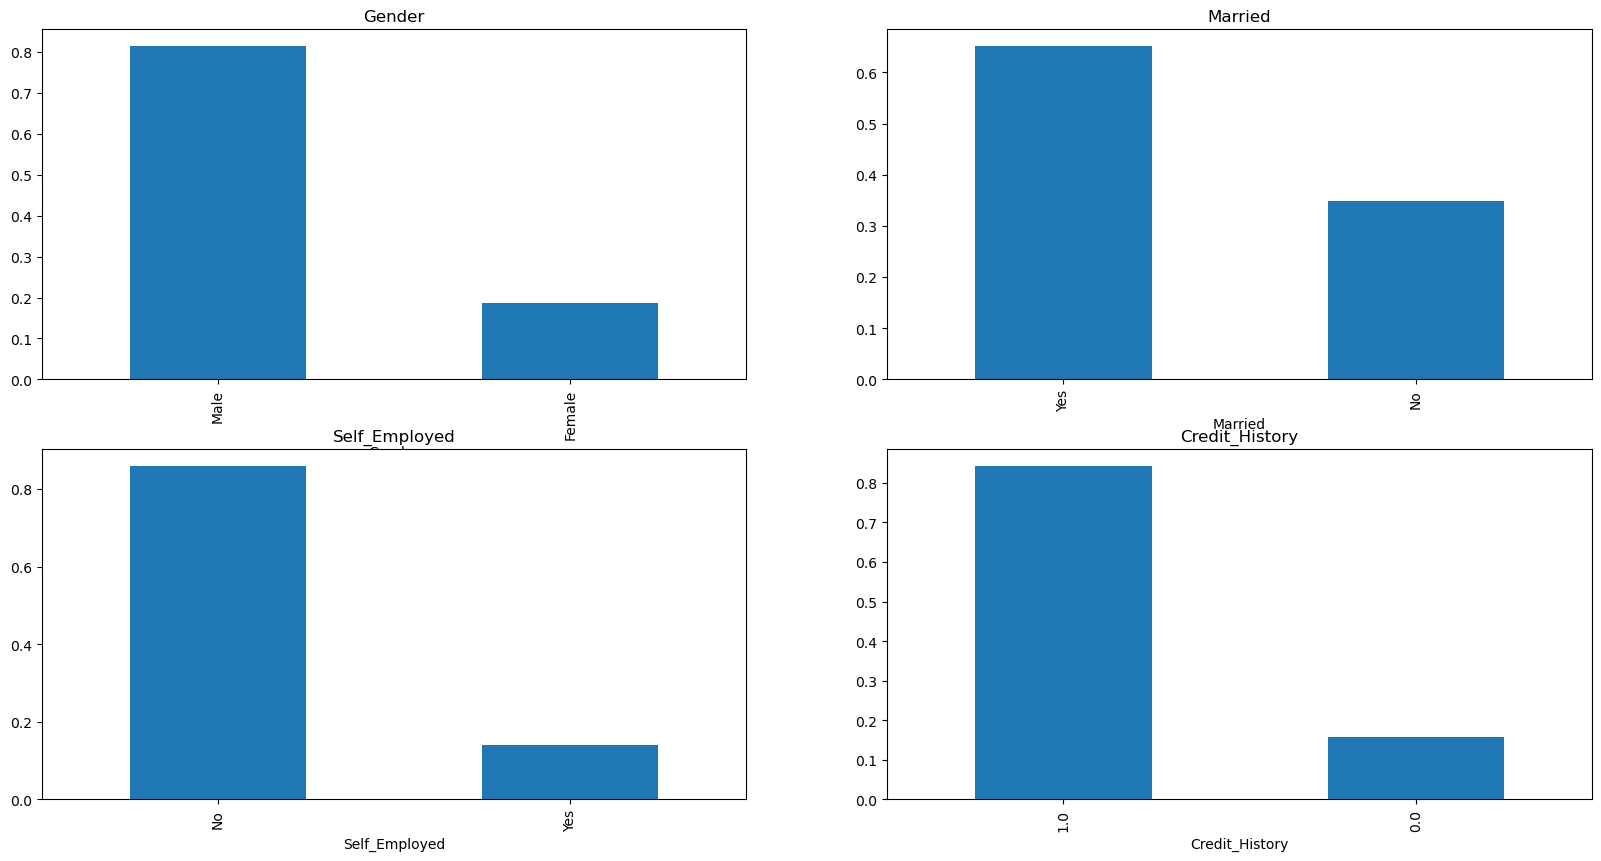

In [25]:
#### Plotting the Independent Variable (Categorical)
plt.figure(1)
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

#### It can be inferred from the above bar plots that:
#### 80% of applicants in the dataset are male.
#### Around 65% of the applicants in the dataset are married.
#### About 15% of applicants in the dataset are self-employed.
#### About 85% of applicants have repaid their debts.
#### Now let’s visualize the ordinal variables.

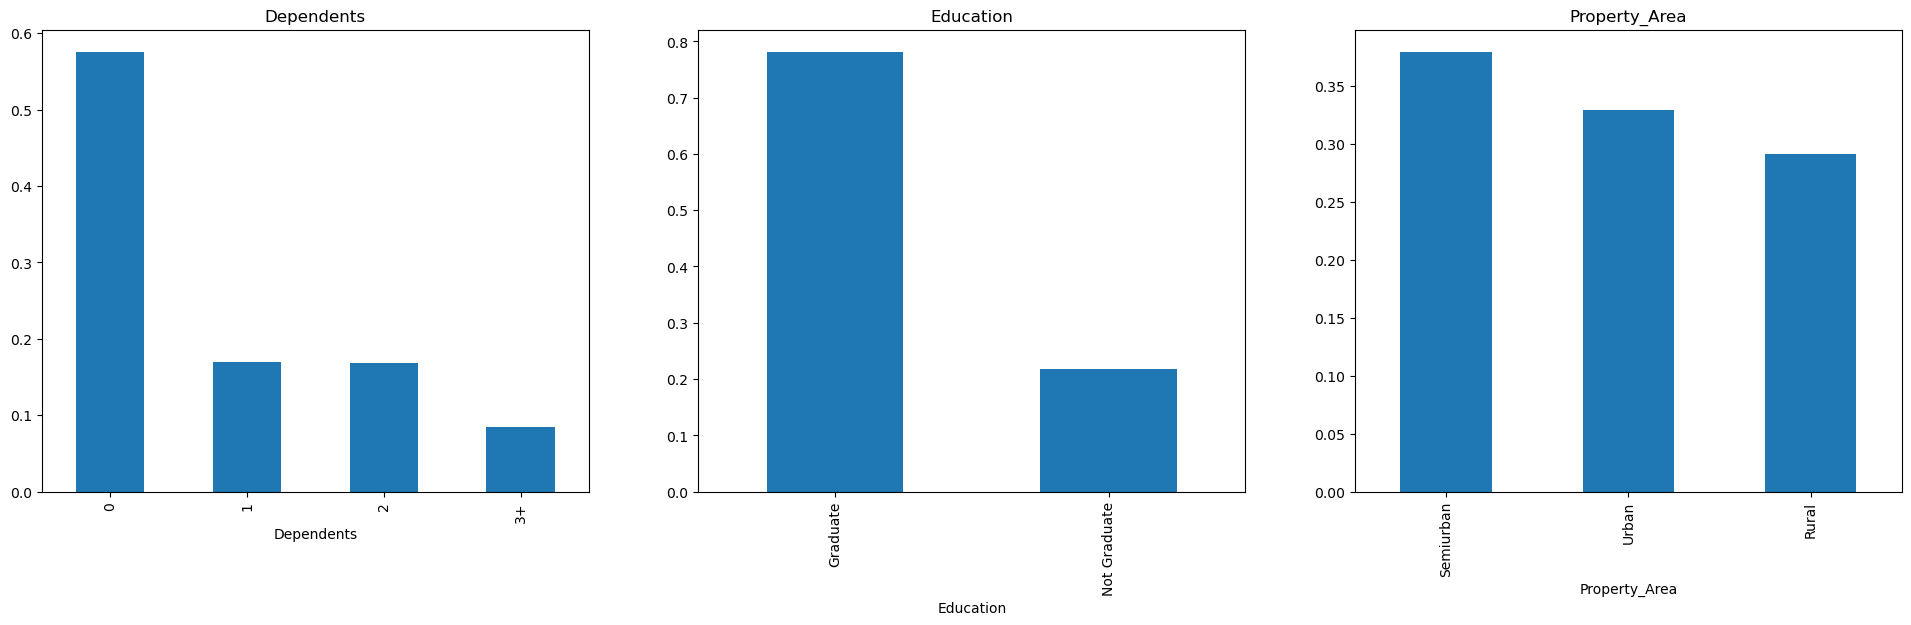

In [27]:
#Now Plotting the Independent Variable (Ordinal)
plt.figure(1) 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title='Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area') 
plt.show()

#### Following inferences can be made from the above bar plots:
#### - Most of the applicants don’t have dependents.
#### - About 80% of the applicants are graduates.
#### - Most of the applicants are from semi-urban areas.

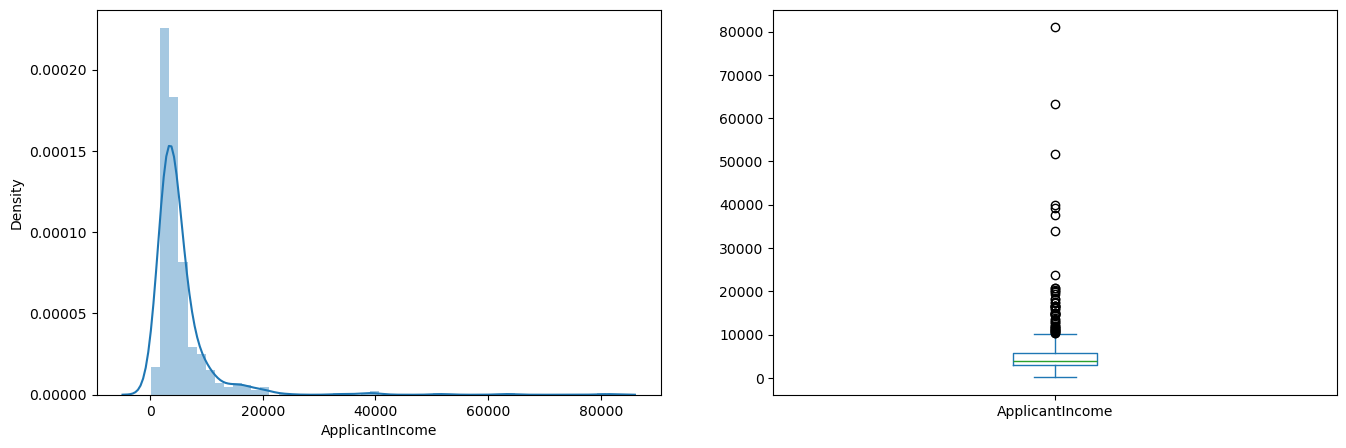

In [134]:
## Now let's visualize the Numerical variables
## Let’s look at the distribution of Applicant income first.
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

#### It can be inferred that most of the data in the distribution of applicant income are towards the left which means it is not normally distributed. We will try to make it normal in later sections as algorithms work better if the data is normally distributed.

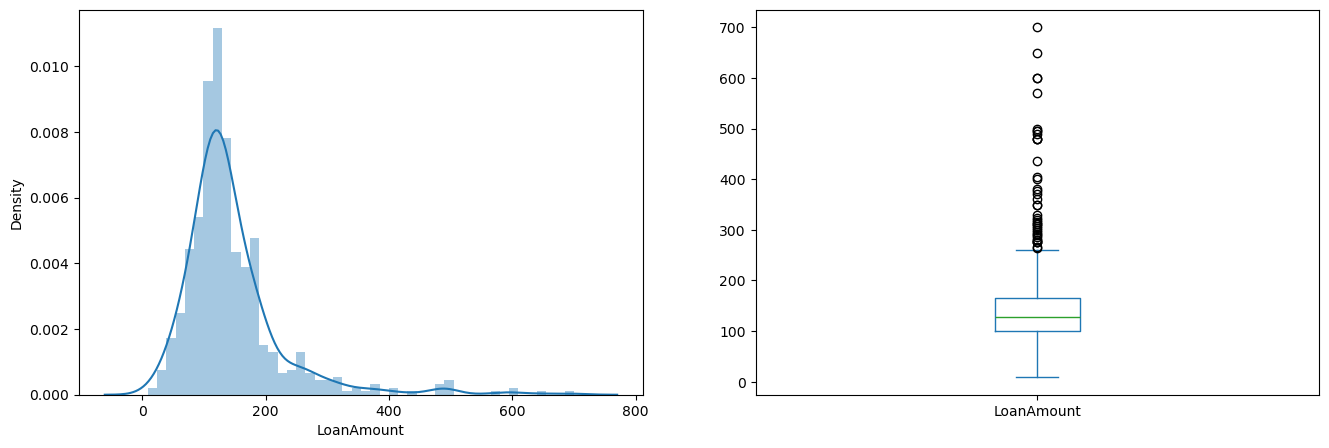

In [132]:
##Let’s look at the distribution of the LoanAmount variable.
#plotting the LoanAmount variable
plt.figure(1) 
plt.subplot(121) 
df=train.dropna() 
sns.distplot(train['LoanAmount']); 
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

#### It can be inferred that there are a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

#### Now let's see how well each feature correlates with Loan Status. So, in the next section, we will look at the bivariate analysis.

#### Bivariate Analysis
#### - Let’s recall some of the hypotheses that we generated earlier:
#### - Applicants with high incomes should have more chances of loan approval.
#### - Applicants who have repaid their previous debts should have higher chances of loan approval.
#### - Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.
#### - Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.

#### Let’s try to test the above-mentioned hypotheses using bivariate analysis
#### After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

### Categorical Independent Variable vs Target Variable
#### First of all, we will find the relation between the target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

<Axes: xlabel='Gender'>

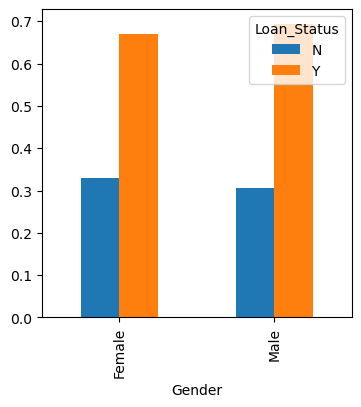

In [37]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

#### It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

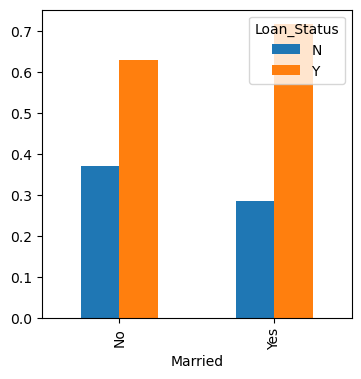

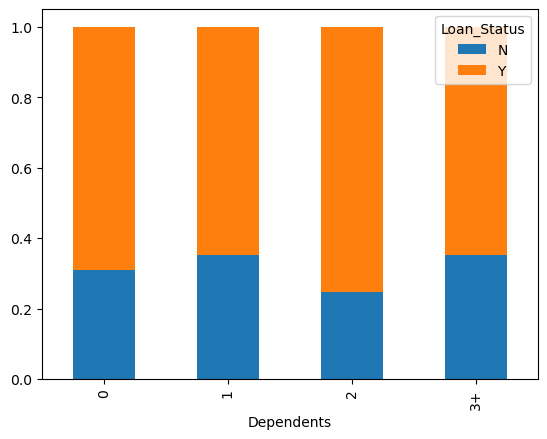

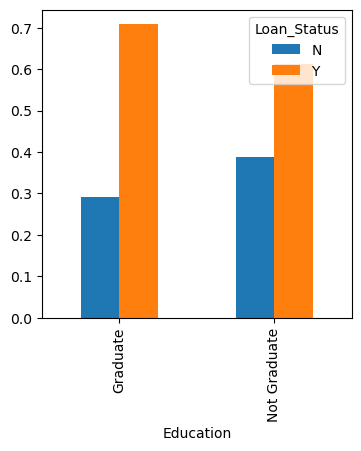

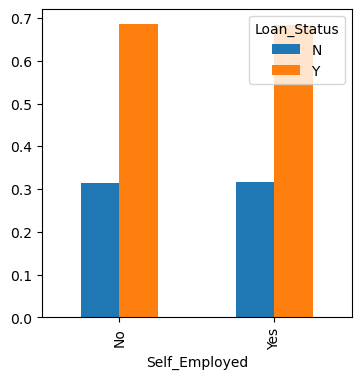

In [39]:
#Now let us visualize the remaining categorical variables vs the target variables.

Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4)) 
plt.show()





#### - The proportion of married applicants is higher for the approved loans.
#### - The distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
#### - There is nothing significant we can infer from Self_Employed vs Loan_Status plot.
#### Now we will look at the relationship between the remaining categorical independent variables and Loan_Status.

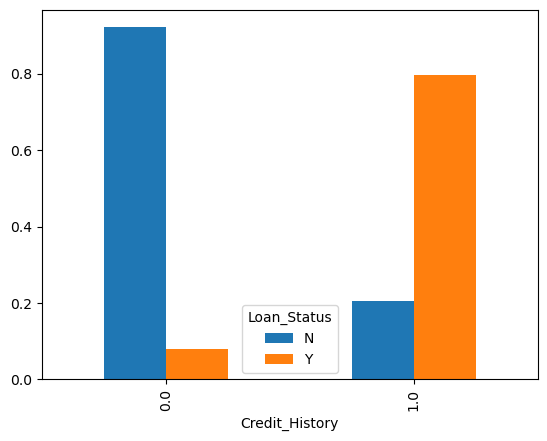

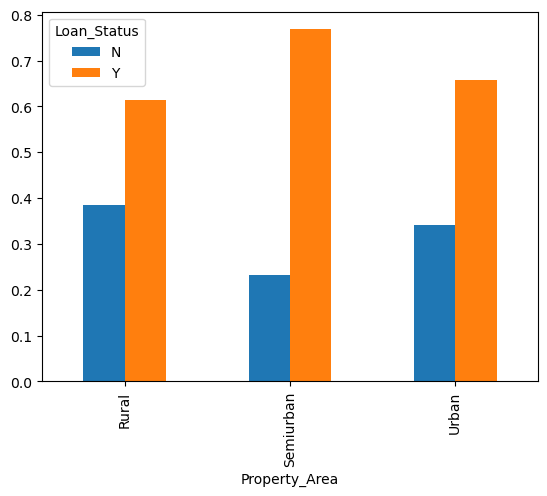

In [41]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar")
                                                                     
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar")
plt.show()

#### - It seems people with a credit history of 1 are more likely to get their loans approved.
#### - The proportion of loans getting approved in semi-urban areas is higher as compared to that in rural or urban areas.
#### Now let’s visualize numerical independent variables with respect to the target variable.

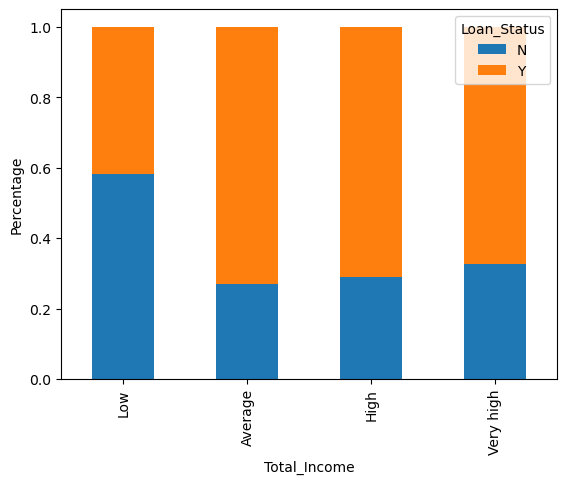

In [43]:
#Numerical Independent Variable vs Target Variable
#Let us combine the Applicant Income and Co-applicant Income and see the combined effect of Total Income on the Loan_Status.
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low', 'Average', 'High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')


#### We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High, and Very High Income.

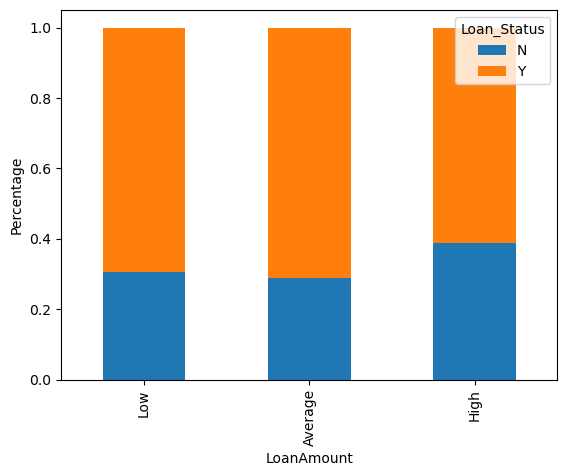

In [45]:
#Let’s visualize the Loan amount variable.
bins=[0,100,200,700] 
group=['Low', 'Average', 'High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True)
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')



#### It can be seen that the proportion of approved loans is higher for Low and Average Loan Amounts as compared to that of High Loan Amounts which supports our hypothesis which considered that the chances of loan approval will be high when the loan amount is less.

In [136]:
train['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

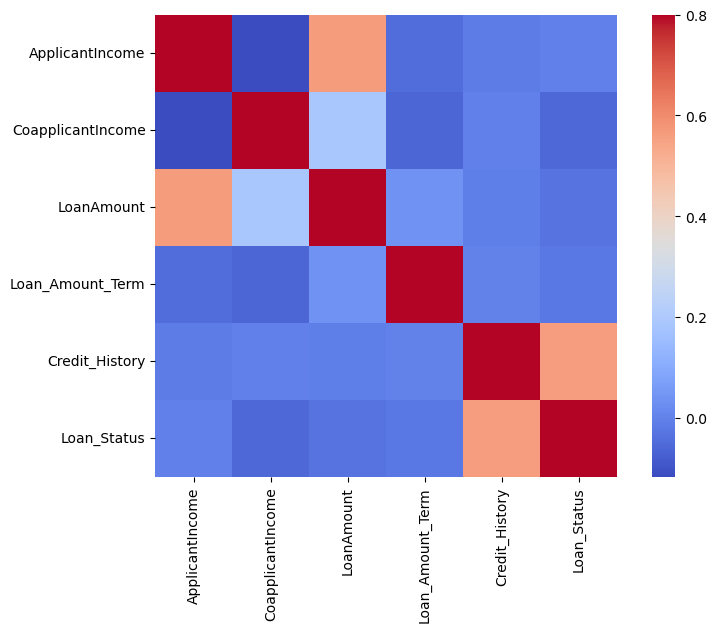

In [138]:
numerical_cols = train.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_cols.corr()
ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(corr_matrix, vmax=.8, square=True, cmap='coolwarm')
plt.show()

#### Now let’s look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker colors mean their correlation is more.

#### We see that the most correlated variables are (ApplicantIncome – LoanAmount) and (Credit_History –Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

In [83]:
train=train.drop(['Total_Income', 'Total_Income_bin', 'LoanAmount_bin'], axis=1)

In [128]:
import warnings
warnings.filterwarnings("ignore")

### Missing Value and Outlier Treatment
#### After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can adversely affect the model performance.

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


#### There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.
#### We will treat the missing values in all the features one by one.
#### We can consider these methods to fill the missing values:
#### - For numerical variables: imputation using mean or median
#### - For categorical variables: imputation using mode

#### Now we will see the LoanAmount variable. As it is a numerical variable, we can use the mean or median to impute the missing values. We will use the median to fill the null values as earlier we saw that “loan amount” have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [148]:
median_value= train['LoanAmount'].median()
train['LoanAmount'].fillna(median_value, inplace=True)

In [ ]:
mode_value= train

In [150]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [156]:
#lets check if all the missing values has been filled or not
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


#### As we can see that all the missing values have been filled in the train dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [160]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
median_value= test['LoanAmount'].median()
test['LoanAmount'].fillna(median_value, inplace=True)

### Outlier Treatment
#### As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data.
#### Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much but reduces the larger values. So, we get distribution similar to the normal distribution.

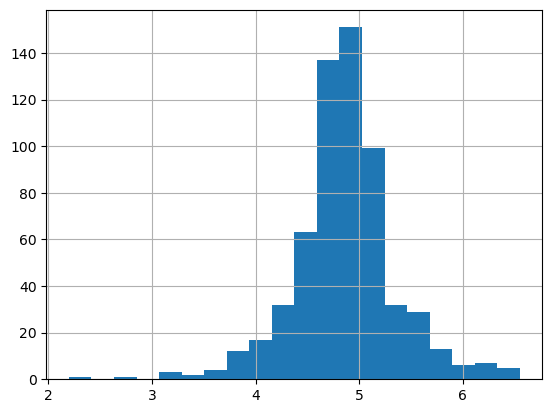

In [163]:
#Let’s visualize the effect of log transformation. We will do similar changes to the test data simultaneously.
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

#### Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

#### Model Building: Part 1
##### Let us make our first model predict the target variable. We will start with Logistic Regression which is used for predicting binary outcomes. Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.

In [167]:
#3Let’s drop the Loan_ID variable as it does not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.
train=train.drop('Loan_ID', axis=1) 
test=test.drop('Loan_ID', axis=1)

In [177]:
#Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the training dataset and save it in another dataset.
X = train.drop('Loan_Status', axis=1) 
y = train.Loan_Status

##### Now we will make dummy variables for the categorical variables. A dummy variable turns categorical variables into a series of 0 and 1, making them a lot easier to quantify and compare. Let us understand the process of dummies first:
##### Consider the “Gender” variable. It has two classes, Male and Female.
##### As logistic regression takes only the numerical values as input, we have to change male and female into a numerical value. Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female. Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male. 

In [180]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [184]:
#We will use the train_test_split function from sklearn to divide our train dataset. So first, let us import train_test_split.
from sklearn.model_selection import train_test_split 
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3)

#### The dataset has been divided into training and validation parts. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [193]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
##Intiliazing the model
model= LogisticRegression()
##Training the model
model.fit(X_train, y_train)
model

LogisticRegression()

In [195]:
##Let’s predict the Loan_Status for the validation set and calculate its accuracy
pred_cv = model.predict(X_cv)

In [197]:
#Let us calculate how accurate our predictions are by calculating the accuracy.
accuracy_score(y_cv, pred_cv)

0.8108108108108109

##### So our predictions are almost 81% accurate, i.e. we have identified 81% of the loan status correctly.


In [213]:
#Let’s make predictions for the test dataset.
pred_test= model.predict(test)

#### Logistic Regression with k-fold cross validation
##### K-Fold Cross-Validation is a robust technique to evaluate a model’s performance while reducing the risk of overfitting. It splits the data into k subsets (folds) and uses one fold for testing while training the model on the remaining folds. The process is repeated k times, and the average performance metric across all folds is used as the final evaluation.

In [216]:

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score


In [218]:
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # K-Fold object

In [220]:
# Initialize Logistic Regression model
model = LogisticRegression()

# Perform cross-validation and calculate accuracy for each fold
accuracies = cross_val_score(model, X_cv, y_cv, cv=kf, scoring='accuracy')

# Display the results
print(f"Accuracies for each fold: {accuracies}")
print(f"Mean accuracy: {np.mean(accuracies)}")

Accuracies for each fold: [0.81081081 0.86486486 0.81081081 0.72972973 0.75675676]
Mean accuracy: 0.7945945945945947


#### The mean validation accuracy for this model is 0.79.


### Feature Engineering
#### Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:
#### - Total Income:- As discussed during bivariate analysis we will combine the Applicant Income and Co-applicant Income. If the total income is high, the chances of loanapproval might also be high.
#### - EMI:- EMI is the monthly amount to be paid by the applicant to repay the loan. The idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
#### - Balance Income:- This is the income left after the EMI has been paid. The idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [224]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

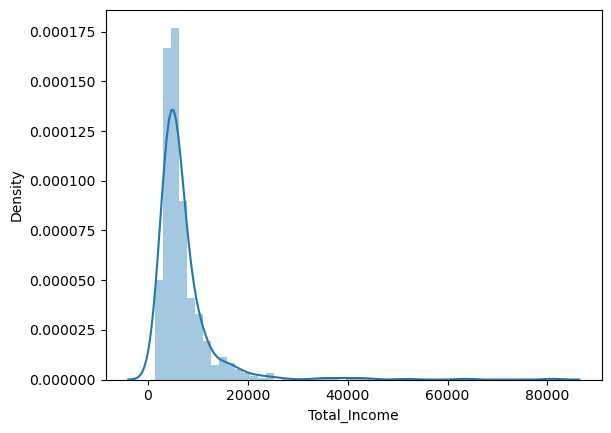

In [226]:
#Let’s check the distribution of Total Income.
sns.distplot(train['Total_Income']);

### We can see it is shifted towards the left, i.e., the distribution is right-skewed. So, let’s take the log transformation to make the distribution normal.

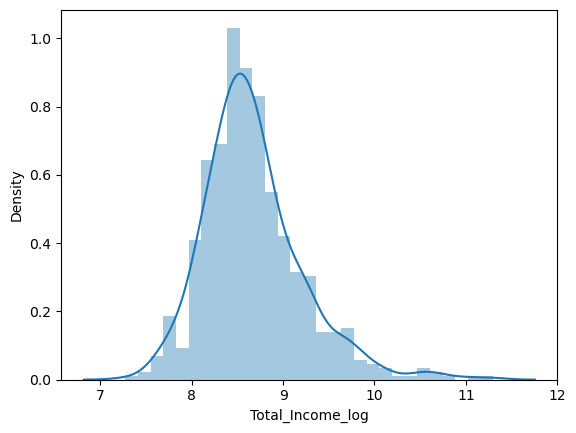

In [229]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

#### Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let’s create the EMI feature now.

In [232]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

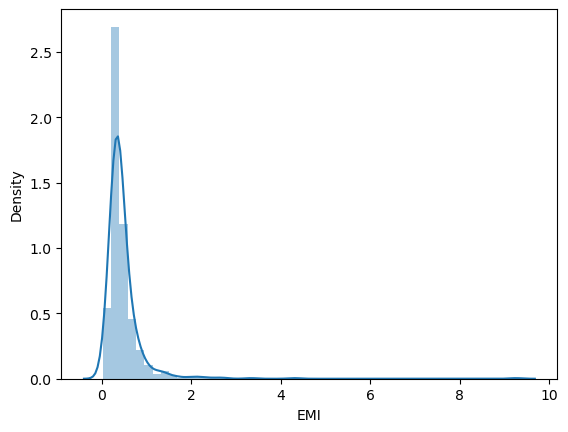

In [234]:
##Let’s check the distribution of the EMI variable.
sns.distplot(train['EMI']);

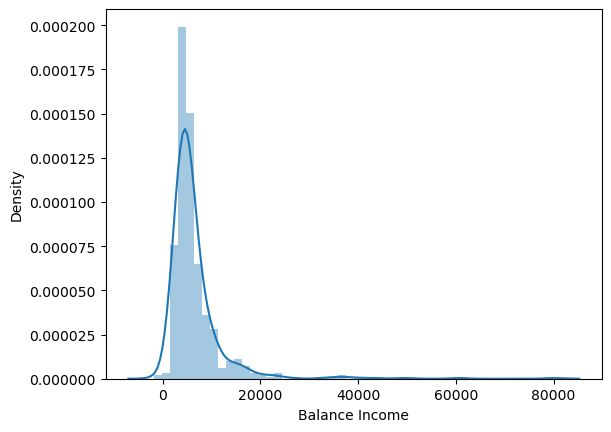

In [236]:
#Let us create the Balance Income feature now and check its distribution.
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income']);


#### Let us now drop the variables which we used to create these new features. The reason for doing this is, that the correlation between those old features and these new features will be very high, and logistic regression assumes that the variables are not highly correlated. We also want to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.


In [239]:
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)

### Model Building: Part 2
#### After creating new features, we can continue the model-building process. So we will start with the decision tree model and then move over to more complex models like RandomForest and XGBoost. We will build the following models in this section.
#### - Decision Tree
#### - Random Forest
#### - XGBoost


In [244]:
#Let’s prepare the data for feeding into the models.
X = train.drop('Loan_Status', axis=1) 
y = train.Loan_Status

In [268]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # K-Fold object
# Initialize Decision Tree model
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [270]:
fold_accuracies = []

for train_index, test_index in kf.split(X):
    # Split data into train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the Decision Tree model
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

print(f"Accuracies for each fold: {fold_accuracies}")
print(f"Mean accuracy: {np.mean(fold_accuracies)}")

Accuracies for each fold: [0.7154471544715447, 0.6991869918699187, 0.7317073170731707, 0.6585365853658537, 0.7049180327868853]
Mean accuracy: 0.7019592163134747


#### The Mean Accuracy for this Model is 0.70. We got an accuracy of 0.70 which is much lesser than the accuracy of the Decision tree model. So let’s build another model, i.e. Random Forest, a tree-based ensemble algorithm and try to improve our model by improving the accuracy.


### Random Forest
#### RandomForest is a tree-based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a     decision tree model.The final prediction can be a function of all the predictions made by the individual learners.In the case of a regression problem, the final prediction can be the mean of all the predictions.

In [279]:
from sklearn.ensemble import RandomForestClassifier
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize Random Forest model
model = RandomForestClassifier(random_state=42)



In [281]:
fold_accuracies = []

for train_index, test_index in kf.split(X):
    # Split data into train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the Random Forest model
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

print(f"Accuracies for each fold: {fold_accuracies}")
print(f"Mean accuracy: {np.mean(fold_accuracies)}")

Accuracies for each fold: [0.7642276422764228, 0.8048780487804879, 0.7723577235772358, 0.7804878048780488, 0.819672131147541]
Mean accuracy: 0.7883246701319473


#### The Mean Accuracy for this model is 0.78.
### We will try to improve the accuracy by tuning the hyperparameters for this model. 
#### We will use grid search to get the optimized values of hyperparameters. Grid-search is a way to select the best of a family of hyperparameters, parametrized by a grid of parameters.We will tune the 'max_depth' and 'n_estimators parameters'. 'max_depth' decides the maximum depth of the tree and 'n_estimators' decides the number of trees that will be used in the random forest model.

In [285]:
##Random Forest Model optimization by using GridSearchCV
from sklearn.model_selection import GridSearchCV    # for hyperparameters tuning to improve the Accuracy



In [288]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X, y)

# Display the best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.8078635212581634


#### so,the best parameters are 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300 and
#### the best cross-validation Accuracy is 0.80

### Feature Importance
#### Let us find the feature importance now, i.e. which features are most important for this problem. We will use the feature_importances_ attribute of sklearn to do so.

<Axes: >

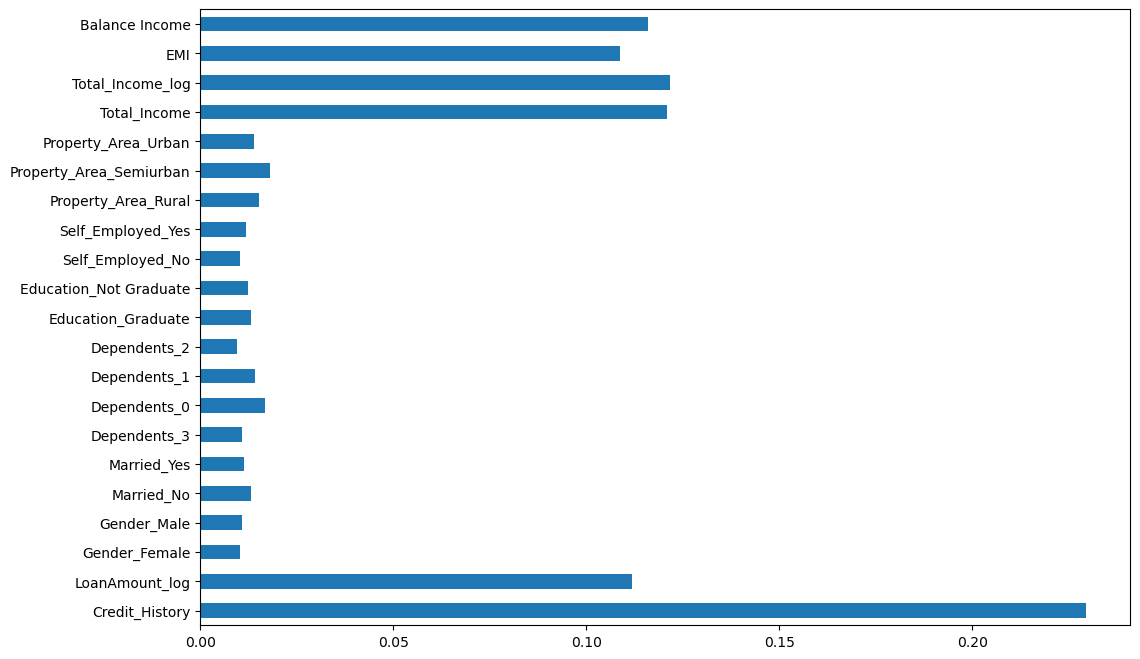

In [291]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))


#### We can see that 'Credit_History' is the most important feature followed by 'Balance Income', 'Total Income',and 'EMI'. So, feature engineering helped us in predicting our target variable.

### XGBOOST
#### XGBoost (eXtreme Gradient Boosting) is a highly efficient and powerful machine learning algorithm often used in structured/tabular datasets. XGBoost works only with numeric variables and we have already replaced the categorical variables with numeric variables.

In [303]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [305]:
# Initialize the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8032786885245902
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.44      0.57        36
           1       0.80      0.95      0.87        86

    accuracy                           0.80       122
   macro avg       0.80      0.70      0.72       122
weighted avg       0.80      0.80      0.78       122



#### We got an accuracy of 0.80 with this model.

